In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('niku.jpg')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.axis("off")

(-0.5, 3023.5, 3023.5, -0.5)

In [2]:
def scale_to_width(img, width):
    scale = width / img.shape[1]
    return cv2.resize(img, dsize=None, fx=scale, fy=scale)

img = scale_to_width(img, 300)

(-0.5, 299.5, 299.5, -0.5)

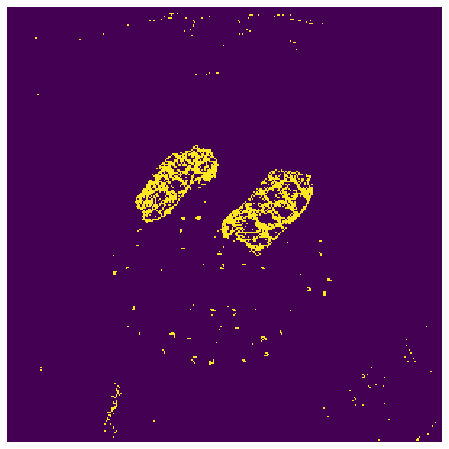

In [3]:
import numpy as np
bgrLower = np.array([0, 0, 130])    # 抽出する色の下限(BGR)
bgrUpper = np.array([120,120, 255])    # 抽出する色の上限(BGR)
img_mask = cv2.inRange(img, bgrLower, bgrUpper) 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_mask)
ax.axis("off")

In [4]:
cv2.imwrite("niku_wb.jpg",img_mask)

True

In [5]:
# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

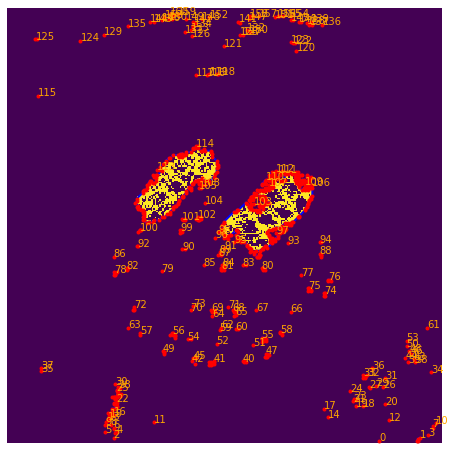

In [6]:
#枠線の表示
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def draw_contours(ax, img_mask, contours):
    ax.imshow(img_mask)  # 画像を表示する。
    ax.set_axis_off()
    
    for i, cnt in enumerate(contours):
        # 形状を変更する。(NumPoints, 1, 2) -> (NumPoints, 2)
        cnt = cnt.squeeze(axis=1)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="orange", size="10")
        

fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(ax, img_mask, contours)

plt.show()

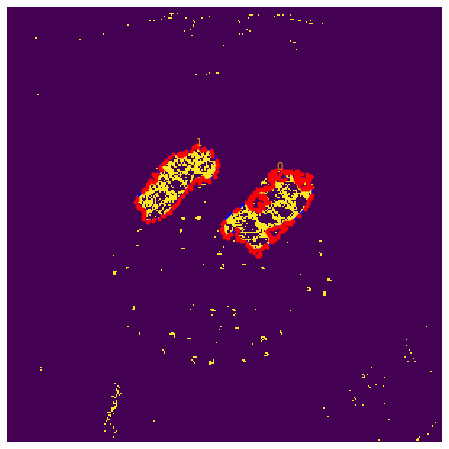

In [7]:
contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
target_contour = max(contours, key=lambda x: cv2.contourArea(x))

fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(ax, img_mask, [contours[0],contours[1]])

In [8]:
#contours[0],contours[1]を両方変数回した
import math
def get_distance(x1, y1, x2, y2):
    d = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return d

In [9]:
import numpy as np
dd=np.array([300])#空白の配列だとif min(dd)> dでエラーが出るため
for i in range(len(contours[0])):
    x3 = contours[0][i][0][0]
    y3 = contours[0][i][0][1]
    for ii in range (len(contours[1])):
        x4 = contours[1][ii][0][0]
        y4 = contours[1][ii][0][1]
        d = get_distance(x3, y3, x4, y4)
        
        if min(dd) > d:
            x3min  =x3
            y3min  =y3
            x4min  =x4
            y4min  =y4
        dd = np.append(dd,d)


26.248809496813376


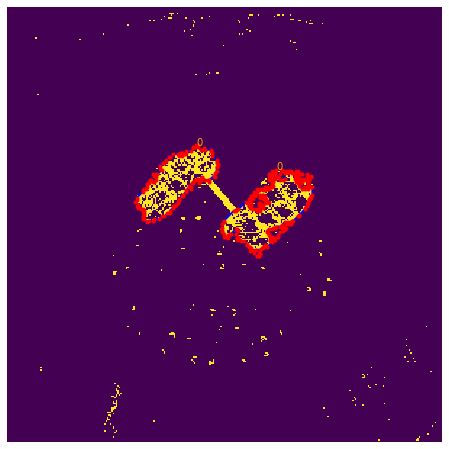

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
cv2.line(img_mask, (x3min, y3min), (x4min, y4min), (255, 255, 255), thickness=3, lineType=cv2.LINE_4)
draw_contours(ax, img_mask, [contours[0]])
draw_contours(ax, img_mask, [contours[1]])
d = get_distance(x3min, y3min, x4min, y4min)
print(d)

In [11]:
cv2.imwrite("niku_wb1.jpg",img_mask)

True